# Import the dataset and do usual data analysis

In [7]:
import pandas as pd


data = pd.read_csv("C:/aerofit_treadmill.txt")

data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Boxplots for numerical features

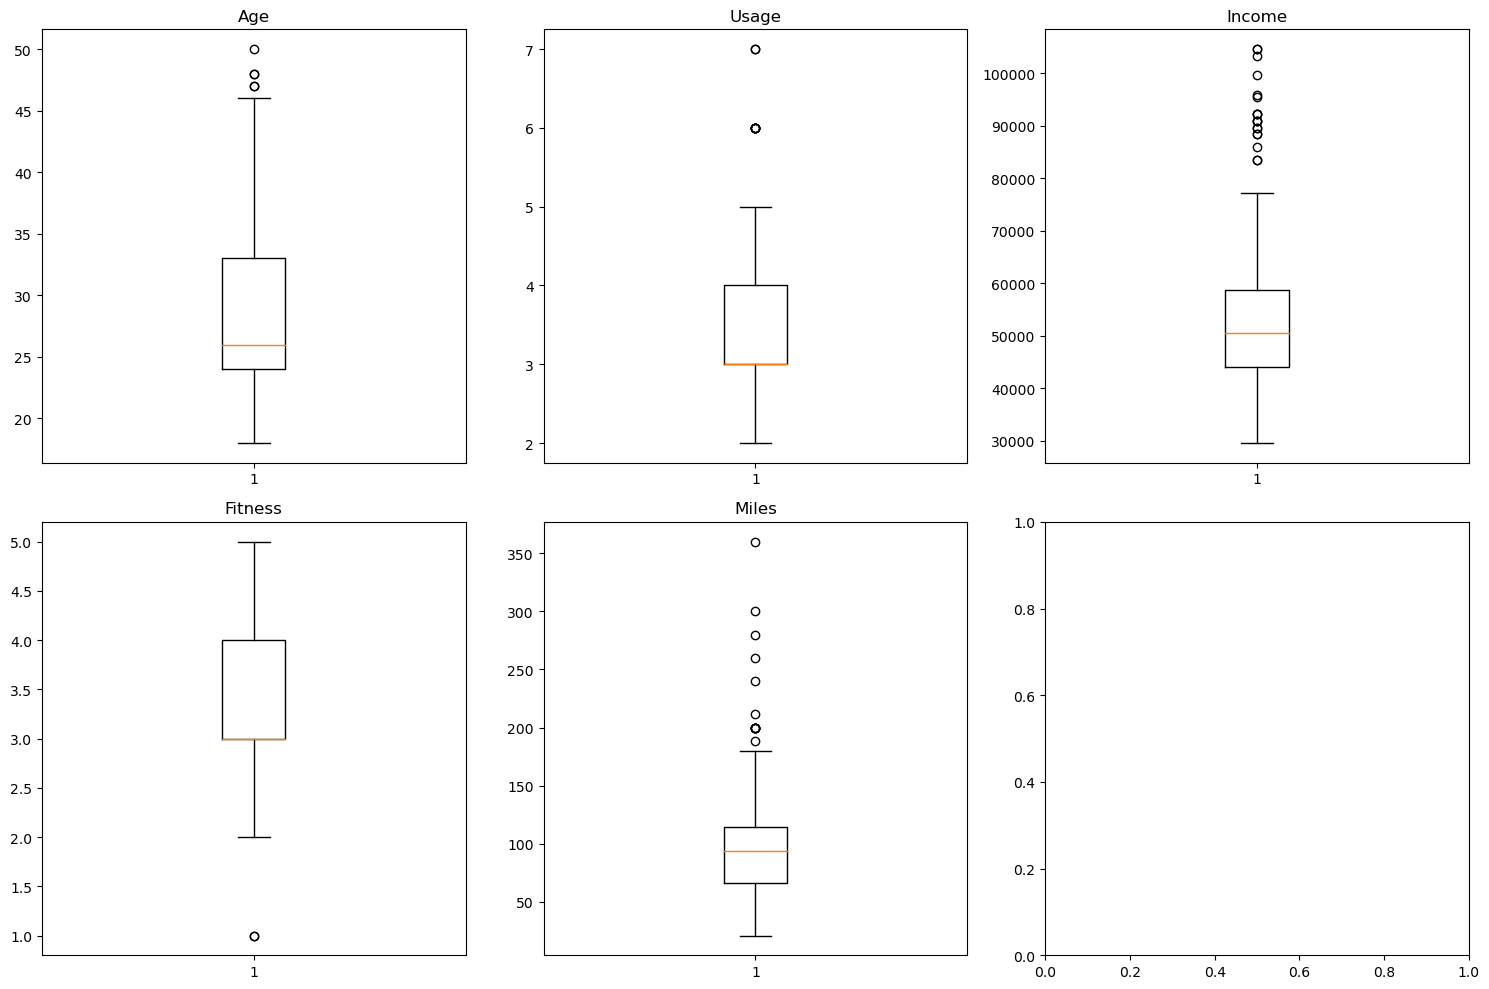

Age          -2.788889
Usage        -0.455556
Income    -3123.077778
Fitness      -0.311111
Miles        -9.194444
dtype: float64

In [8]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
cols = ['Age', 'Usage', 'Income', 'Fitness', 'Miles']
for i, col in enumerate(cols):
    ax = axes[i//3, i%3]
    ax.boxplot(data[col])
    ax.set_title(col)
plt.tight_layout()
plt.show()

data[['Age', 'Usage', 'Income', 'Fitness', 'Miles']].median() - data[['Age', 'Usage', 'Income', 'Fitness', 'Miles']].mean()



# Difference between mean and median

# Countplot of product purchased by marital status

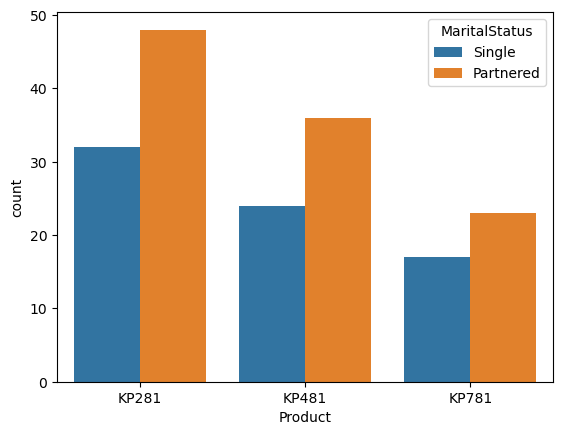

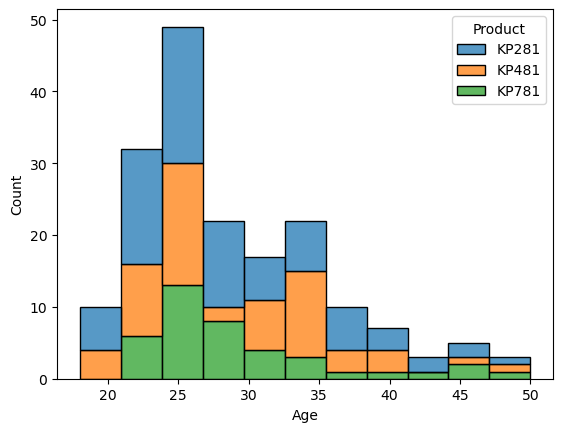

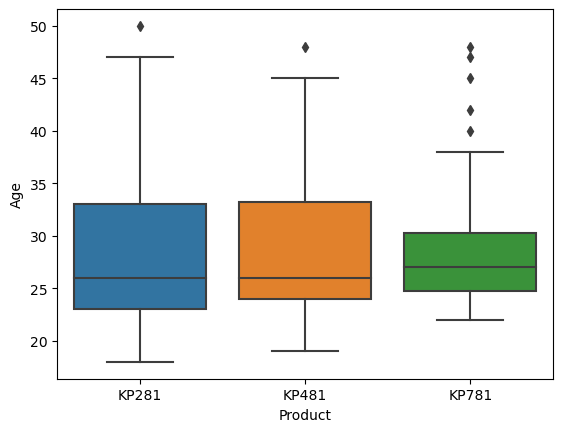

In [9]:
import seaborn as sns


sns.countplot(x='Product', hue='MaritalStatus', data=data)
plt.show()


sns.histplot(data=data, x='Age', hue='Product', multiple='stack')
plt.show()


sns.boxplot(x='Product', y='Age', data=data)
plt.show()

# Histograms of age by product purchased

# Boxplots of age by product purchased

In [10]:
marginal_probs = pd.crosstab(index=data['Product'], columns='count', normalize='columns') * 100
marginal_probs.columns = ['Percentage']
marginal_probs

,Percentage
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


C:\Users\criss\AppData\Local\Temp\ipykernel_16340\884538037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


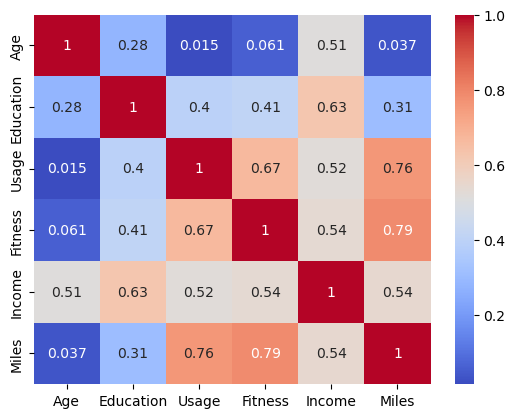

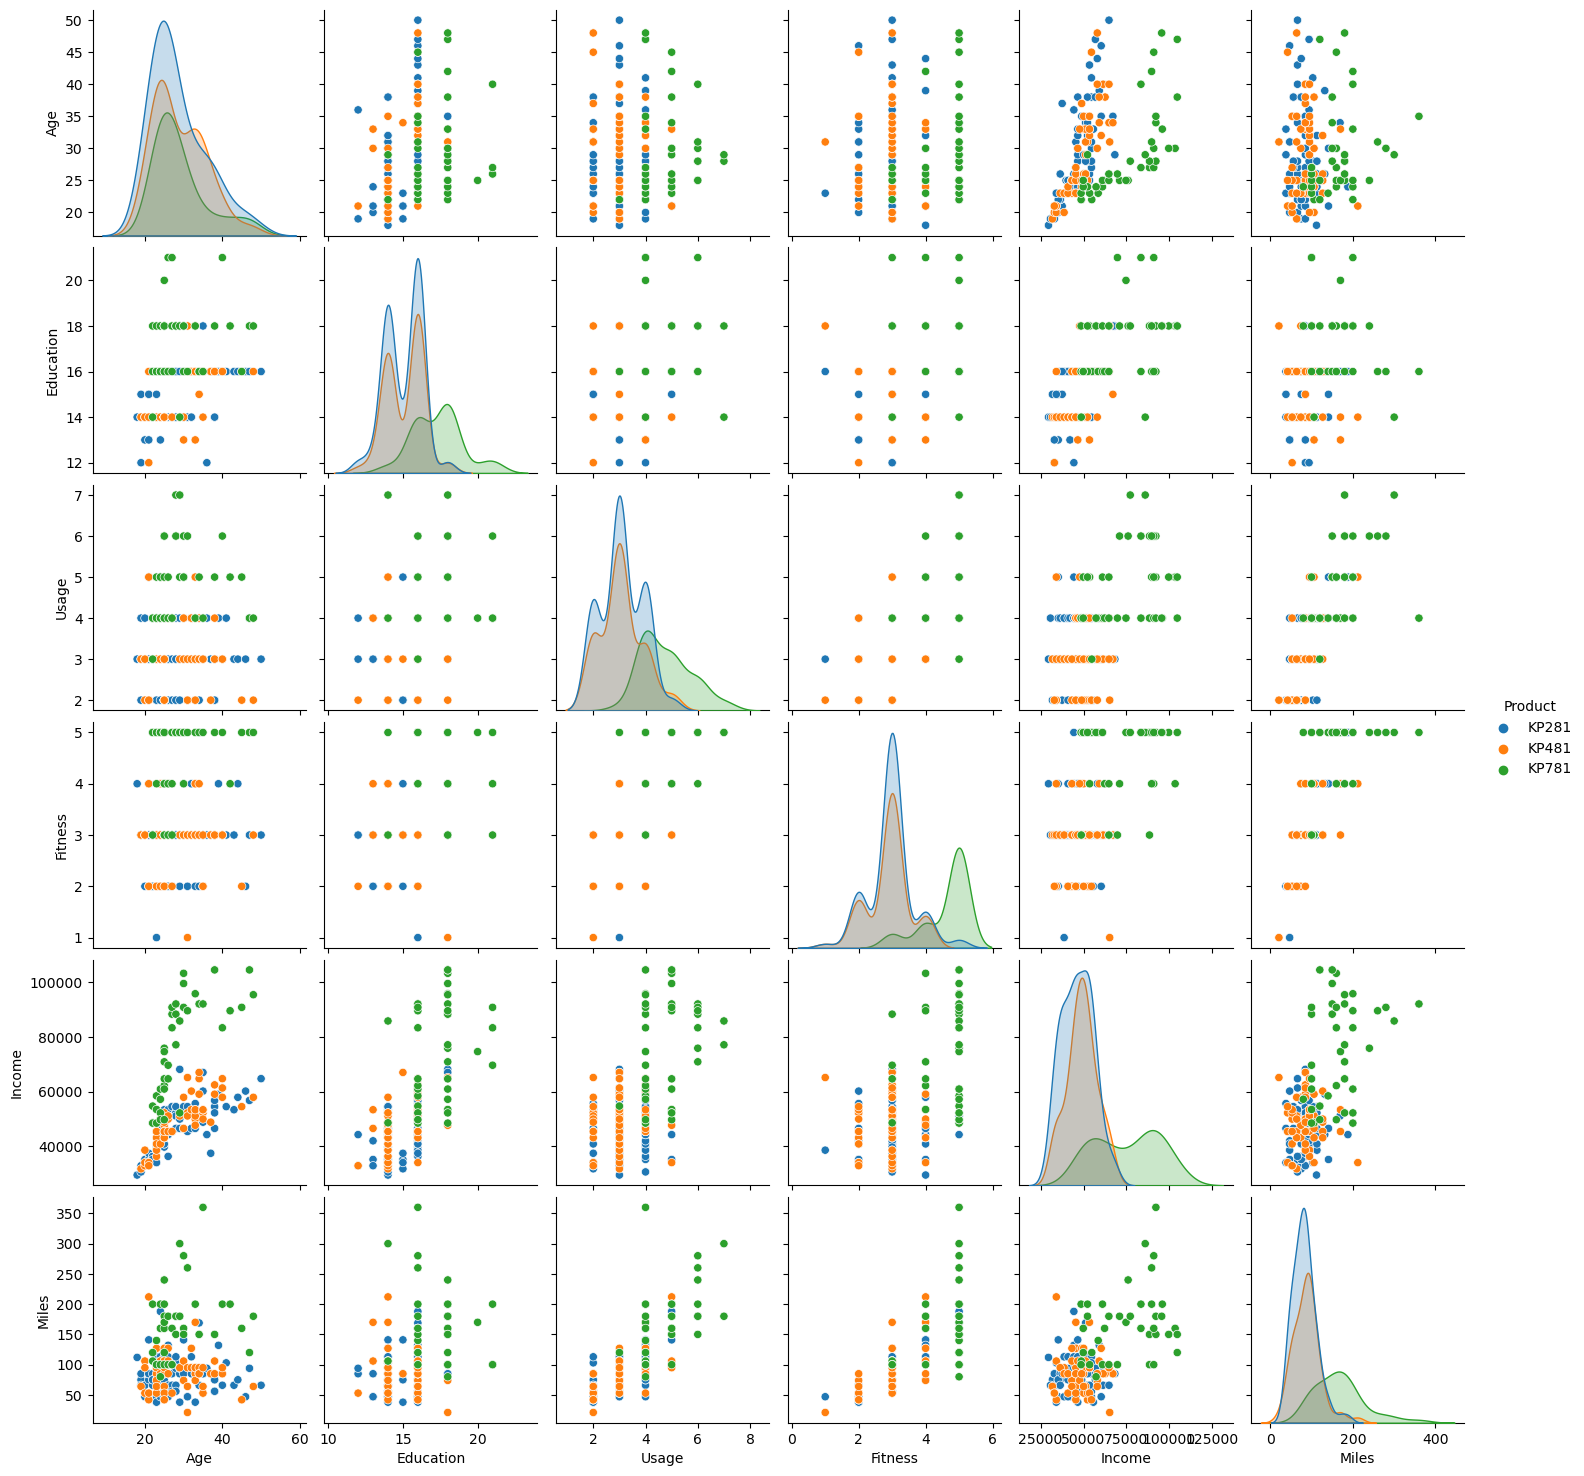

In [11]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Pair plots
sns.pairplot(data, hue='Product')
plt.show()

In [12]:
conditional_probs = pd.crosstab(index=data['Product'], columns=data['Gender'], normalize='index') * 100
conditional_probs.columns = ['Female', 'Male']
conditional_probs

,Female,Male
Product,,
KP281,50.000000,50.000000
KP481,48.333333,51.666667
KP781,17.500000,82.500000


# conclusion:-

# Insights could include targeting mid-level runners with the KP481 treadmill who have higher fitness levels and usage frequency.